In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#!pip install pdfplumber
import pdfplumber
from IPython.display import display

movie_data = pd.read_csv("IMDB-Movie-Data.csv")
movie_data = movie_data[pd.notnull(movie_data['Revenue (Millions)'])].reset_index()
movie_data.drop(columns=['index'], inplace = True)
change_types = ['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
for i in change_types:
    movie_data[[i]] = movie_data[[i]].apply(pd.to_numeric)
movie_data['Genre'] = movie_data['Genre'].apply(lambda x: x.split(','))
movie_data['Actors'] = movie_data['Actors'].apply(lambda x: re.split(',\s?', x))
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"[Action, Adventure, Fantasy]",European mercenaries searching for black powde...,Yimou Zhang,"[Matt Damon, Tian Jing, Willem Dafoe, Andy Lau]",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"[Comedy, Drama, Music]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"[Ryan Gosling, Emma Stone, Rosemarie DeWitt, J...",2016,128,8.3,258682,151.06,93.0
7,9,The Lost City of Z,"[Action, Adventure, Biography]","A true-life drama, centering on British explor...",James Gray,"[Charlie Hunnam, Robert Pattinson, Sienna Mill...",2016,141,7.1,7188,8.01,78.0
8,10,Passengers,"[Adventure, Drama, Romance]",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"[Jennifer Lawrence, Chris Pratt, Michael Sheen...",2016,116,7.0,192177,100.01,41.0
9,11,Fantastic Beasts and Where to Find Them,"[Adventure, Family, Fantasy]",The adventures of writer Newt Scamander in New...,David Yates,"[Eddie Redmayne, Katherine Waterston, Alison S...",2016,133,7.5,232072,234.02,66.0


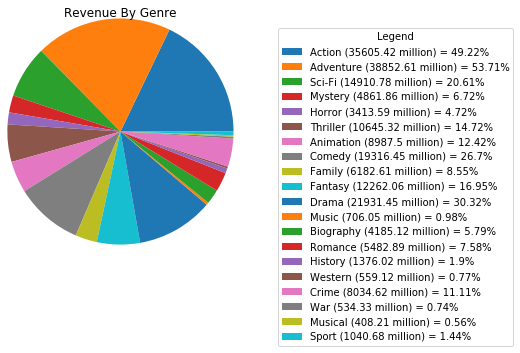

In [92]:
'''
Gets each genre and maps how much each genre made (allows multiple overlaps).
'''

genre_list = {}
total_sum = sum(movie_data['Revenue (Millions)'])
for i in range(len(movie_data['Genre'])):
    for j in movie_data.loc[i,'Genre']:
        if j in genre_list:
            genre_list[j] = genre_list[j] + movie_data.loc[i,'Revenue (Millions)']
        else:
            genre_list[j] = movie_data.loc[i,'Revenue (Millions)']
labels = []
for i in genre_list.keys():
    labels.append(str(i) + " (" + str(round(genre_list[i],2))+' million)' +" = " + str(round(((genre_list[i]/total_sum)*100),2)) + "%")
plt.pie(genre_list.values(), radius = 1.3)
plt.title('Revenue By Genre')
plt.legend(labels, bbox_to_anchor=(1.2, 1.0), title="Legend", loc='upper left')
plt.show()

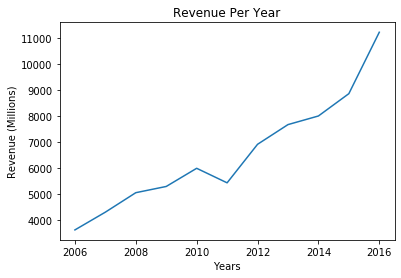

In [93]:
revenue = []
for i in np.unique(movie_data['Year']):
    revenue.append(sum(movie_data[movie_data['Year'] == i]['Revenue (Millions)']))
plt.plot(np.unique(movie_data['Year']), revenue)
plt.xlabel('Years')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue Per Year')
plt.show()

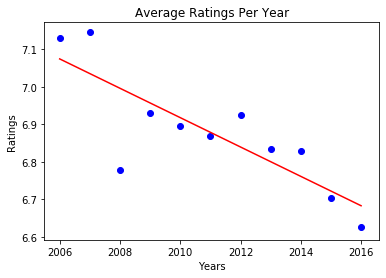

In [94]:
x = np.unique(movie_data['Year'])
y = []
for i in x:
    temp = movie_data[movie_data['Year'] == i]
    y.append(sum(temp['Rating'])/len(temp))
    plt.scatter(i, y[-1], c = 'b')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, c = 'r')
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Average Ratings Per Year')
plt.show()

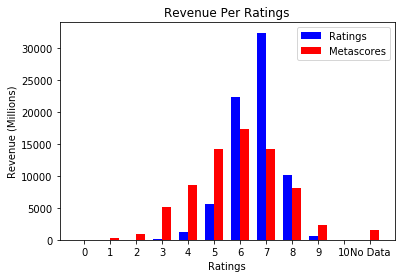

In [95]:
'''
This floors the ratings i.e. 4.3 and 4.9 would both be in the 4 category. It then graphs the revenue per ratings.
Does the same with Metascore and puts them side by side. Can be a comparison here.
'''

import math
rev_per_rating = [0] * 12
rev_per_meta = [0] * 12
for index in range(len(list(movie_data['Rating']))):
    rev_per_rating[math.floor(movie_data.loc[index,'Rating'])] += movie_data.loc[index,'Revenue (Millions)']
    if math. isnan(movie_data.loc[index,'Metascore']):
        rev_per_meta[-1] += movie_data.loc[index,'Revenue (Millions)']
    else:
        rev_per_meta[math.floor((movie_data.loc[index,'Metascore'])/10)] += movie_data.loc[index,'Revenue (Millions)']
plt.bar(np.arange(12), rev_per_rating, 0.35, color = 'b', label = "Ratings")
plt.bar(np.arange(12)+0.35, rev_per_meta, 0.35, color = 'r', label = "Metascores")
plt.xlabel('Ratings')
plt.ylabel('Revenue (Millions)')
plt.title('Revenue Per Ratings')
plt.xticks(np.arange(12)+0.35 / 2,['0','1','2','3','4','5','6','7','8','9','10',"No Data"])
plt.legend(loc = 'best')
plt.show()

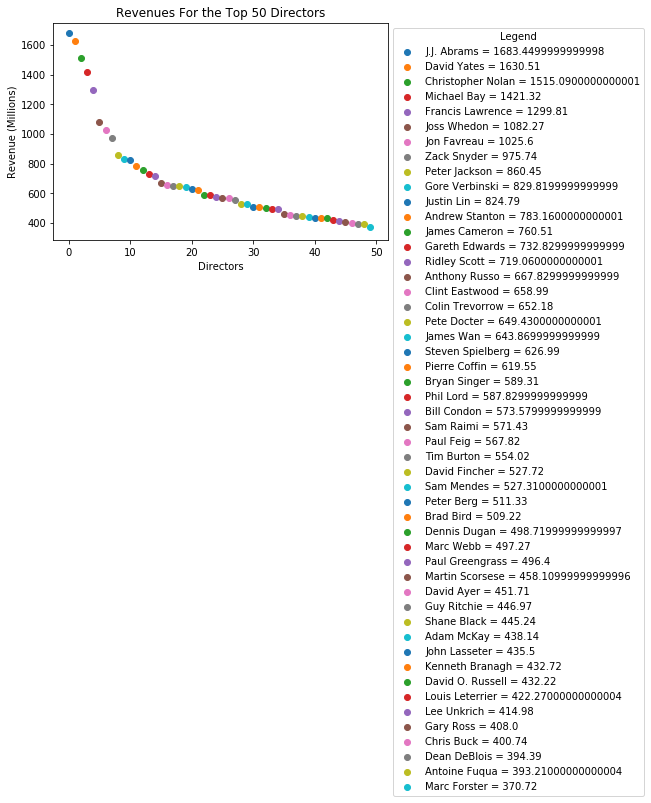

In [96]:
'''
Rough plot.
'''

director_list = {}
for i in range(len(movie_data['Director'])):
    director = movie_data.loc[i,'Director']
    if director in director_list:
        director_list[director] = director_list[director] + movie_data.loc[i,'Revenue (Millions)']
    else:
        director_list[director] = movie_data.loc[i,'Revenue (Millions)']
sorted_directors = sorted(director_list.items(), key=lambda x: x[1], reverse = True)
sorted_directors = sorted_directors[:50]
for x,i in enumerate(sorted_directors):
    plt.scatter(x,i[1], label = i[0] + " = " + str(i[1]))
plt.title("Revenues For the Top 50 Directors")
plt.xlabel("Directors")
plt.ylabel("Revenue (Millions)")
plt.legend(bbox_to_anchor=(1.0, 1.0), title="Legend", loc='upper left')
plt.show()

This section is about creating the key t-charts to match actors, actresses, directors, and genres according to their rank or points from the two databases - imdb and yga (YouGovAmerica). These keys will be used to go through list of actors, directors, and list of genres in order to average or match their points/rank. Essentially, qualitative data like names and genre types become quantative and can hopefully help with ML prediction. 

In [97]:
'''
Read datasets in changed points to actual numbers to make it easier to use
'''

actor_data = pd.read_csv("imdb_actors.csv", encoding='latin-1')
actress_data = pd.read_csv("imdb_actresses.csv", encoding='latin-1')
director_data = pd.read_csv("imdb_directors.csv", encoding='latin-1')

def to_num(lst):
    ret = []
    for i in range(len(lst)):
        x = re.search("(\d+)[^\d]*", lst[i])
        ret.append(int(x.group(1)))
    return ret

actor_data['Description'] = to_num(actor_data['Description'])
actor_data.rename(columns={"Description": "Points"}, inplace = True)
actor_data = actor_data.filter(['Points', 'Name'])

actress_data['Description'] = to_num(actress_data['Description'])
actress_data.rename(columns={"Description": "Points"}, inplace = True)
actress_data = actress_data.filter(['Points', 'Name'])

imdb_cast_key = pd.concat([actor_data, actress_data])
imdb_cast_key = imdb_cast_key.sort_values('Points', ascending = False).reset_index(drop=True)

director_data['Description'] = to_num(director_data['Description'])
director_data.rename(columns={"Description": "Points"}, inplace = True)
imdb_director_key = director_data.filter(['Points', 'Name'])

display(imdb_cast_key)
display(imdb_director_key)

,Points,Name
0,167820,Morgan Freeman
1,160473,Brad Pitt
2,157865,Leonardo DiCaprio
3,151313,Robert De Niro
4,140716,Matt Damon
5,137003,Michael Caine
6,126932,Christian Bale
7,118663,Tom Hanks
8,112643,Gary Oldman
9,105941,Al Pacino


,Points,Name
0,143174,Christopher Nolan
1,131784,Steven Spielberg
2,108315,Quentin Tarantino
3,103526,Martin Scorsese
4,83185,David Fincher
5,70150,Ridley Scott
6,63606,Stanley Kubrick
7,63408,Robert Zemeckis
8,58488,Francis Ford Coppola
9,56012,Clint Eastwood


In [98]:
def pdf_to_df(file):
    pdfdump = ""
    with pdfplumber.open(file) as pdf:
        for page in range(0, 6):
            pdfdump += pdf.pages[page].extract_text()
            pdfdump += "\n"
            
    key = {"Name":[], "Rank":[], "Fame(%)":[], "Popularity(%)":[]}
    for line in pdfdump.splitlines():
            match = re.search("(\d+)\s(.*)\s(\d+)%\s(\d+)%",line)
            if match:
                key["Name"].append(match.group(2))
                key["Rank"].append(match.group(1))
                key["Fame(%)"].append(match.group(3))
                key["Popularity(%)"].append(match.group(4))

    return pd.DataFrame(key)

In [99]:
yga_cast_key = pdf_to_df('yga_cast.pdf')
yga_director_key = pdf_to_df('yga_directors.pdf')

display(yga_cast_key)
display(yga_director_key)

,Name,Rank,Fame(%),Popularity(%)
0,Robin Williams,1,96,84
1,Betty White,2,95,82
2,Denzel Washington,3,97,82
3,Morgan Freeman,4,96,80
4,Harrison Ford,5,96,77
5,Samuel L. Jackson,6,93,76
6,Sean Connery,7,92,76
7,Eddie Murphy,8,96,76
8,James Earl Jones,9,87,75
9,Tom Hanks,10,96,75


,Name,Rank,Fame(%),Popularity(%)
0,Steven Spielberg,1,92,70
1,Alfred Hitchcock,2,89,70
2,Walt Disney,3,95,70
3,Ron Howard,4,84,66
4,George Lucas,5,88,64
5,Mel Brooks,6,81,61
6,Jim Henson,7,79,58
7,Orson Welles,8,76,58
8,Quentin Tarantino,9,85,55
9,James Cameron,10,81,55


In [100]:
sorted_genres = sorted(genre_list.items(), key=lambda x: x[1], reverse=True)

key = {"Genre":[], "Rank":[], "Total Revenue":[]}
count = 1
for (k, v) in sorted_genres: 
    key['Genre'].append(k)
    key['Rank'].append(count)
    key['Total Revenue'].append(v)
    count += 1
    
genre_key = pd.DataFrame(key)
genre_key

,Genre,Rank,Total Revenue
0,Adventure,1,38852.61
1,Action,2,35605.42
2,Drama,3,21931.45
3,Comedy,4,19316.45
4,Sci-Fi,5,14910.78
5,Fantasy,6,12262.06
6,Thriller,7,10645.32
7,Animation,8,8987.50
8,Crime,9,8034.62
9,Family,10,6182.61


In [101]:
'''
Address that there are 1492 actors/actress that dont have point associated
https://today.yougov.com/ratings/entertainment/popularity/all-time-actors-actresses/all
'''
def avg_lst_keys(x, key_data, lst_label, x_label, y_label):
    lst = x[lst_label]
    sum = 0
    count = 0
    for obj in lst:
        if not key_data[key_data[x_label] == obj].empty:
            pts = int(key_data.loc[key_data[x_label] == obj, y_label].iloc[0])
            sum += pts
            count += 1
        else:
            missing_obj.add(obj)
    if count:
        return (sum/count)
    else:
        return 0
    
def match_key(x, key_data, label):
    if not key_data[key_data['Name'] == x['Director']].empty:
        return int(key_data.loc[key_data['Name'] == x['Director'], label].iloc[0])
    else:
        missing_obj.add(x['Director'])
        return 0
        

In [102]:
missing_obj = set()
movie_data['imdb_avg_cast_pts'] = movie_data.apply(lambda x: avg_lst_keys(x, imdb_cast_key, "Actors", "Name", "Points"), axis = 1)
print("# of IMDB Missing Cast Members: ", len(missing_obj))            
            
missing_obj = set()
movie_data['yga_avg_cast_rank'] = movie_data.apply(lambda x: avg_lst_keys(x, yga_cast_key, "Actors", "Name", "Rank"), axis = 1)
print("# of YGA Missing Cast Members: ", len(missing_obj))       
            
missing_obj = set()
movie_data['imdb_avg_director_pts'] = movie_data.apply(lambda x: match_key(x, imdb_director_key, "Points"), axis = 1)
print("# of IMDB Missing Directors: ", len(missing_obj))
            
missing_obj = set()
movie_data['yga_avg_director_rank'] = movie_data.apply(lambda x: match_key(x, yga_director_key, "Rank"), axis = 1)
print("# of YGA Missing Directors: ", len(missing_obj))

missing_obj = set()
movie_data['genre_avg_rank'] = movie_data.apply(lambda x: avg_lst_keys(x, genre_key, "Genre", "Genre", "Rank"), axis = 1)
print("# of Missing Genres: ", len(missing_obj))

# of IMDB Missing Cast Members:  1104
# of YGA Missing Cast Members:  1081
# of IMDB Missing Directors:  283
# of YGA Missing Directors:  478
# of Missing Genres:  0


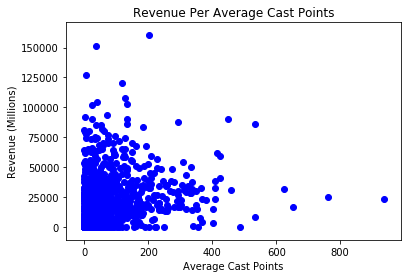

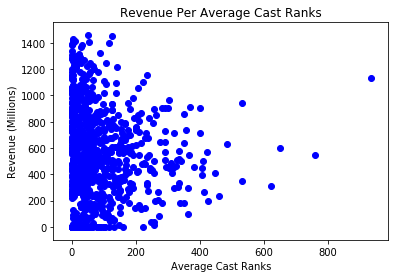

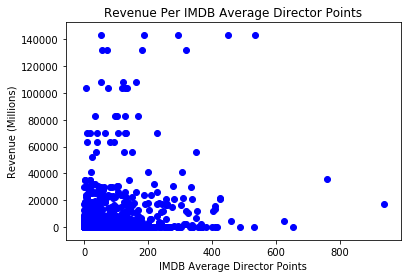

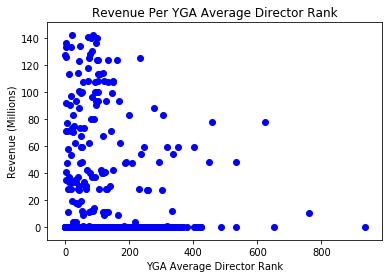

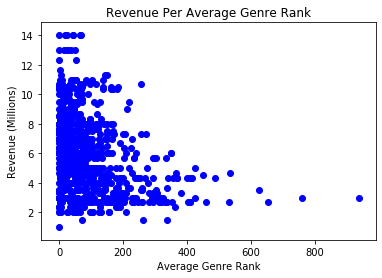

In [103]:
avgs = ['imdb_avg_cast_pts', 'yga_avg_cast_rank', 'imdb_avg_director_pts', 'yga_avg_director_rank', 'genre_avg_rank']
avg_name = ["Average Cast Points", "Average Cast Ranks", "IMDB Average Director Points", "YGA Average Director Rank", "Average Genre Rank"]
for i,x in zip(avgs,avg_name):
    for j in range(len(movie_data[i])):
        plt.scatter(movie_data.loc[j,'Revenue (Millions)'], movie_data.loc[j,i], c = 'b')
    plt.title("Revenue Per " + x)
    plt.xlabel(x)
    plt.ylabel('Revenue (Millions)')
    plt.show()

In [104]:
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdb_avg_cast_pts,yga_avg_cast_rank,imdb_avg_director_pts,yga_avg_director_rank,genre_avg_rank
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0,28064.500000,304.500000,0,0,2.666667
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0,23137.333333,784.666667,70150,28,6.000000
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0,12445.000000,1015.000000,18353,30,10.500000
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0,38746.000000,204.250000,0,0,7.333333
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0,34086.750000,465.000000,10153,0,3.000000
5,6,The Great Wall,"[Action, Adventure, Fantasy]",European mercenaries searching for black powde...,Yimou Zhang,"[Matt Damon, Tian Jing, Willem Dafoe, Andy Lau]",2016,103,6.1,56036,45.13,42.0,64122.333333,154.500000,3587,0,3.000000
6,7,La La Land,"[Comedy, Drama, Music]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"[Ryan Gosling, Emma Stone, Rosemarie DeWitt, J...",2016,128,8.3,258682,151.06,93.0,31991.750000,153.500000,16062,0,8.000000
7,9,The Lost City of Z,"[Action, Adventure, Biography]","A true-life drama, centering on British explor...",James Gray,"[Charlie Hunnam, Robert Pattinson, Sienna Mill...",2016,141,7.1,7188,8.01,78.0,7528.000000,928.000000,2128,0,5.333333
8,10,Passengers,"[Adventure, Drama, Romance]",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"[Jennifer Lawrence, Chris Pratt, Michael Sheen...",2016,116,7.0,192177,100.01,41.0,35206.250000,310.000000,14580,0,5.000000
9,11,Fantastic Beasts and Where to Find Them,"[Adventure, Family, Fantasy]",The adventures of writer Newt Scamander in New...,David Yates,"[Eddie Redmayne, Katherine Waterston, Alison S...",2016,133,7.5,232072,234.02,66.0,15013.000000,1158.000000,0,0,5.666667


In [105]:
movie_data2 = movie_data.filter(['Rank', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore', 'imdb_avg_cast_pts', 'yga_avg_cast_rank', 'imdb_avg_director_pts', 'yga_avg_director_rank', 'genre_avg_rank'])
movie_data2.replace([np.inf, -np.inf], np.nan, inplace=True)
movie_data2.fillna(0, inplace=True)
movie_data2

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,imdb_avg_cast_pts,yga_avg_cast_rank,imdb_avg_director_pts,yga_avg_director_rank,genre_avg_rank
0,1,2014,121,8.1,757074,333.13,76.0,28064.500000,304.500000,0,0,2.666667
1,2,2012,124,7.0,485820,126.46,65.0,23137.333333,784.666667,70150,28,6.000000
2,3,2016,117,7.3,157606,138.12,62.0,12445.000000,1015.000000,18353,30,10.500000
3,4,2016,108,7.2,60545,270.32,59.0,38746.000000,204.250000,0,0,7.333333
4,5,2016,123,6.2,393727,325.02,40.0,34086.750000,465.000000,10153,0,3.000000
5,6,2016,103,6.1,56036,45.13,42.0,64122.333333,154.500000,3587,0,3.000000
6,7,2016,128,8.3,258682,151.06,93.0,31991.750000,153.500000,16062,0,8.000000
7,9,2016,141,7.1,7188,8.01,78.0,7528.000000,928.000000,2128,0,5.333333
8,10,2016,116,7.0,192177,100.01,41.0,35206.250000,310.000000,14580,0,5.000000
9,11,2016,133,7.5,232072,234.02,66.0,15013.000000,1158.000000,0,0,5.666667


In [106]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(movie_data2.drop('Revenue (Millions)', axis=1), movie_data2['Revenue (Millions)'], test_size=0.2)

print(len(data_train),'samples in training data and', len(data_test),'samples in test data\n', )

697 samples in training data and 175 samples in test data



In [107]:
movie_data2['Revenue (Millions)'].describe()
# ax = movie_data.plot.bar(x='Title', y='Revenue (Millions)', rot=0)
# ax

count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier

dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Linear SVM": 
            {'classifier': SVC(),
                 'params': [
                            {
                             'C': [1, 10, 100, 1000],
                             'gamma': [0.001, 0.0001],
                             'kernel': ['linear']
                            }
                           ]
            },
    "Gradient Boosting Classifier": 
            {'classifier': GradientBoostingClassifier(),
                 'params': [
                            {
                             'learning_rate': [0.05, 0.1],
                             'n_estimators' :[50, 100, 200],
                             'max_depth':[3,None]
                            }
                           ]
            },
    "Decision Tree":
            {'classifier': tree.DecisionTreeClassifier(),
                 'params': [
                            {
                             'max_depth':[3,None]
                            }
                             ]
            },
    "Random Forest": 
            {'classifier': RandomForestClassifier(),
                 'params': {}
            },
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            }
}

In [109]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', # scoring metric
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)
    return df_results

In [110]:
df_results = batch_classify(data_train, label_train, data_test, label_test)
display(df_results.sort_values(by='test_score', ascending=False))

ValueError: Unknown label type: 'continuous'

In [ ]:
np.any(np.isnan(movie_data))

In [ ]:
np.isfinite(movie_data.all())